# Challenges for week 6

Now that we've seen how to use scikit-learn, statsmodels and LIME to do modelling, it's time for you to  apply this knowledge. This week has three challenges. 

Each challenge has three components:
1. **Programming**: Applying one of the programming or data analysis steps in Python you learned in the tutorial
2. **Interpretation**: Explaining what you are doing and interpreting the results of the data analysis in MarkDown 
3. **Reflection**: Connecting these concepts with the literature of the week in a short reflection (*max 300 words*)

**Some important notes for the challenges:**
1. These challenges are a warming up, and help you get ready for class. Make sure to give them a try on all of them. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next challenge (but make sure to hand it in).
2. While we of course like when you get all the answers right, the important thing is to exercise and apply the knowledge. So we will still accept challenges that may not be complete, as long as we see enough effort *for each challenge*. The rubric (see Canvas) reflects this.
3. Delivering the challenge on time on Canvas assignment is critical, as it helps also prepare for the DA live session. Check on Canvas how to hand it in.

### Facing issues? 

We are constantly monitoring the issues on the GitHub to help you out. Don't hesitate to log an issue there, explaining well what the problem is, showing the code you are using, and the error message you may be receiving. 

**Important:** We are only monitoring the repository in weekdays, from 9.30 to 17.00. Issues logged after this time will most likely be answered the next day. This means you should not wait for our response before submitting a challenge :-)

## General Scenario - valid for Challenges 1, 2 and 3

In DA5 and 6, we will work with a simulated dataset from an online store that created a set of campaigns. This dataset will be used to predict whether someone has made purchases, or not (i.e., ```purchase``` ) and, if so, how much they have spent (i.e.,```order_euros```). 

Scenario:
Our webshop has launched new campaigns to increase sales (as binary, ```purchase```) and revenue (```order_euros```). We are now only interested in sales (i.e., binary DV).

We are interested in two campaigns (indicated in column ```type_campaign```):
* The CPC campaign running on Facebook and Google
* The influencer campaign running on Instagram and Facebook

We want to know if each campaign led to an increase in sales compared to the other campaigns (i.e., any traffic source that is not set as CPC or influencer).

These predictions will be made about the dependent variable (or target): ```purchase```. Your independent variables (or features) will be relevant characteristics available on (or created from) the dataset.


## Challenge 1


### Programming challenge

In this challange, we focus on modelling and evaluating machine learning models. Therefore, we have prepared a merged dataset with all variables necessary. You can find it in the Github folder; it is called ```da6_fulldata.csv.gz``` (for csv file) or ```da6_fulldata.pkl.gz``` (fir pickle file). It contains information about:
* sessions. Columns ```session_id```, ```session_timestamp```, ```user_agent```, ```referral```, ```type_campaign``` tell us  the details of the browser that visited the site (user_agent), when the visit started, what the referral was, and what campaign the referral came from.
* orders. Columns ```order_euros``` and ```purchase``` include information if a user made a purchase and how much they spent.
* users. Columns ```user_id```, ```reg_name```, ```registration_date```, ```initial_referrer```, ```preferential_client``` and ```age``` for registered users tell us their name, when they created their profile, their age, the referral that they followed when creating their profile, and whether they are part of an exclusive club of preferential clients

*Note: this is a different dataset than you used last week. This dataset is already merged and has additional information about campaigns the webshop is running on different sites. The dataset does not have all the variables you need. You will have to crate them in this challenge.* 

In the first challenge, you need to:
* Propose which control variables are relevant to be included in the model.
* Create the necessary features for different campaigns based on the column ```type_campaign``` (this column includes information about what kind of camapign someone has seen. You can use this information to create the necessary variables for identifying users coming from the CPC or infleuncer campaign) and for your control variables (that you chose in step 1).
* Create two models for statistical testing (with **statsmodels**). One only with the campaign information (cpc and infleuncer), and a second model with at least one additional independent or control variable. It can be one of the variables about the session or user. Sales, as a binary variable should be your DV.

*IMPORTANT: Don't forget to split your data in train / test datasets, and use only the train dataset here, as done also in the DA6 tutorial.*

### Interpretation

Justify your choice (in MarkDown) for the additional variable for the second model

Write a **technical** and a **business** interpretation for the creation of the dataset. 

* The **technical** interpretation should explain the results of the models and technical comparison of the model (which model works better).
* The **business** summary should explain which control variable(s) you chose and why, which model you choose and what the results of the model tell us about each of the campaigns.

Use Markdown formatting to make the summary clear and visually appealing, and constantly refer to the output of the code to substantiate your claims. If needed, you can combine the code with the summary (e.g., start the summary in markdown, run the relevant code in the next cell, and interpret the output using MarkDown in the next cell).

### Reflection
Finn & Wadhwa (2014) argue that digital analytic practices such as the example case in this week's challanges have ethical impacts including identifiability, inequality, a chilling effect, the objectification, exploitation and manipulation of consumers as well as information asymmetries. For the reflection, choose one of the impacts and reflect to what extent such a campaign evaluation and performance prediction as conducted in this challange may have such an impact. Provide specific examples to link the ethical impact to the case.

### Necessary steps
1. Explore dataset
2. Define my independent, dependent variables, propose control variable
3. Data minimization - keep only necessary variables (as chosen in step 2)
4. Data cleaning - prepare the neessary variables
5. Descriptives and visualisations - these are not covered in the solution videos this week, refer to DA3 and DA4.
6. Statistical modelling and model comparison

Step 1 - exploration

In [1]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import lime
%matplotlib inline

In [2]:
#opening the file
df = pd.read_pickle('/Users/jstrych1/Documents/Digital_Analytics/2122s1/6_DA6/da6_fulldata.pkl.gz')

Inspection of the file

In [3]:
df.columns

Index(['session_id', 'order_euros', 'purchase', 'session_timestamp',
       'user_agent', 'referral', 'type_campaign', 'user_id', 'reg_name', 'age',
       'registration_date', 'initial_referrer', 'preferential_client'],
      dtype='object')

In [4]:
df.dtypes

session_id               int64
order_euros            float64
purchase               float64
session_timestamp       object
user_agent              object
referral                object
type_campaign           object
user_id                float64
reg_name                object
age                    float64
registration_date       object
initial_referrer        object
preferential_client    float64
dtype: object

In [5]:
df.isna().sum()

session_id                 0
order_euros            37499
purchase               37499
session_timestamp          0
user_agent                 0
referral                   0
type_campaign          23629
user_id                34822
reg_name               34822
age                    34822
registration_date      34822
initial_referrer       34822
preferential_client    47028
dtype: int64

In [6]:
df.head()

,session_id,order_euros,purchase,session_timestamp,user_agent,referral,type_campaign,user_id,reg_name,age,registration_date,initial_referrer,preferential_client
0,5555694754,153.5,1.0,2021-10-06 16:10:27,Mozilla/5.0 (iPhone; CPU iPhone OS 4_2_1 like ...,facebook.com,CPC,NaN,NaN,NaN,NaN,NaN,NaN
1,5555694755,NaN,NaN,2021-09-30 08:36:38,Opera/8.28.(Windows NT 5.1; lo-LA) Presto/2.9....,facebook.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5555694756,NaN,NaN,2021-09-29 15:19:24,Opera/9.44.(Windows NT 6.2; ks-IN) Presto/2.9....,facebook.com,CPC,NaN,NaN,NaN,NaN,NaN,NaN
3,5555694757,NaN,NaN,2021-10-08 02:20:09,Opera/8.34.(Windows NT 10.0; yi-US) Presto/2.9...,facebook.com,influencerA,NaN,NaN,NaN,NaN,NaN,NaN
4,5555694758,NaN,NaN,2021-10-06 19:56:22,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_8...,google.com,organic,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,session_id,order_euros,purchase,user_id,age,preferential_client
count,5.000000e+04,12501.000000,12501.0,1.517800e+04,15178.000000,2972.0
mean,5.555720e+09,177.550356,1.0,5.588636e+07,46.620899,1.0
std,1.443390e+04,53.545786,0.0,2.893178e+02,18.696757,0.0
min,5.555695e+09,110.100000,1.0,5.588586e+07,16.000000,1.0
25%,5.555707e+09,137.600000,1.0,5.588611e+07,30.000000,1.0
50%,5.555720e+09,162.100000,1.0,5.588636e+07,46.000000,1.0
75%,5.555732e+09,203.400000,1.0,5.588661e+07,63.000000,1.0
max,5.555745e+09,439.200000,1.0,5.588686e+07,79.000000,1.0


**Step 2 - variable choice**

*DV/target = purchase*
* It seems that purchase has many missing values. I will need to fix it.

*IV/features = type_campaign*
* I am asked to compare CPC and infleuncer campaigns to other campaigns. I need to create the necessary variables

*Controls/features = age, referral*
* I have decided that age may be important variable infleuncing purchase and the relation between my IV and purchase. As age is missing for many cases, I will need to fix it. 

**Step 3 - minimization**

Here, I will only keep the necessary variables (session_id, purchase, type_campaign, referral, age).

In [8]:
df = df[['session_id', 'purchase', 'type_campaign',
                'age', 'referral']]

In [9]:
df.head()

,session_id,purchase,type_campaign,age,referral
0,5555694754,1.0,CPC,NaN,facebook.com
1,5555694755,NaN,NaN,NaN,facebook.com
2,5555694756,NaN,CPC,NaN,facebook.com
3,5555694757,NaN,influencerA,NaN,facebook.com
4,5555694758,NaN,organic,NaN,google.com


**Data cleaning and trasformation**

In [10]:
#Exploring and fixing my DV
df['purchase'].describe()

count    12501.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: purchase, dtype: float64

In [11]:
df['purchase'].isna().sum()

37499

In [12]:
df['purchase'] = df['purchase'].fillna(0)

In [13]:
df['purchase'].describe()

count    50000.000000
mean         0.250020
std          0.433029
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: purchase, dtype: float64

In [14]:
#Exploring and fixing my IV
df['type_campaign'].value_counts()

influencerA    8405
influencerB    6328
CPC            5252
SEA            3202
organic        3184
Name: type_campaign, dtype: int64

In [15]:
df['type_campaign'].isna().sum()

23629

In [ ]:
#df = df.dropna(subset=['type_campaign'])

In [16]:
df['type_campaign'].isna().sum()

23629

In [ ]:
df['type_campaign'].value_counts()

In [17]:
#Create the necessary dummy variables
def create_categories_campaign(row):
    if 'type_campaign' in row.keys():
        if 'influencerA' in str(row['type_campaign']):
            row['influencer'] = 1
        elif 'influencerB' in str(row['type_campaign']):
            row['influencer'] = 1
        elif 'CPC' in str(row['type_campaign']):
            row['CPC'] = 1
        else:
            row['other_campaign'] = 1
    
    return row




In [19]:
def create_categories_referral(row):    
    if 'google' in str(row['referral']).lower():
        row['referral_google'] = 1
    else:
        row['referral_google'] = 0

    if 'instagram' in str(row['referral']).lower():
        row['referral_instagram'] = 1
    else:
        row['referral_instagram'] = 0
 

    if 'facebook' in str(row['referral']).lower():
        row['referral_facebook'] = 1
    else:
        row['referral_facebook'] = 0
    return row
 

In [18]:
df = df.apply(create_categories_campaign, axis=1)

In [20]:
df = df.apply(create_categories_referral, axis=1)

In [21]:
df.head()

,CPC,age,influencer,other_campaign,purchase,referral,session_id,type_campaign,referral_google,referral_instagram,referral_facebook
0,1.0,NaN,NaN,NaN,1.0,facebook.com,5555694754,CPC,0,0,1
1,NaN,NaN,NaN,1.0,0.0,facebook.com,5555694755,NaN,0,0,1
2,1.0,NaN,NaN,NaN,0.0,facebook.com,5555694756,CPC,0,0,1
3,NaN,NaN,1.0,NaN,0.0,facebook.com,5555694757,influencerA,0,0,1
4,NaN,NaN,NaN,1.0,0.0,google.com,5555694758,organic,1,0,0


In [22]:
df[['CPC', 'influencer', 'other_campaign']]= df[['CPC', 'influencer', 'other_campaign']].fillna(0)

In [23]:
df.head()

,CPC,age,influencer,other_campaign,purchase,referral,session_id,type_campaign,referral_google,referral_instagram,referral_facebook
0,1.0,NaN,0.0,0.0,1.0,facebook.com,5555694754,CPC,0,0,1
1,0.0,NaN,0.0,1.0,0.0,facebook.com,5555694755,NaN,0,0,1
2,1.0,NaN,0.0,0.0,0.0,facebook.com,5555694756,CPC,0,0,1
3,0.0,NaN,1.0,0.0,0.0,facebook.com,5555694757,influencerA,0,0,1
4,0.0,NaN,0.0,1.0,0.0,google.com,5555694758,organic,1,0,0


In [24]:
df.groupby('CPC')['referral'].value_counts()

CPC  referral          
0.0  instagram.com         11045
     google.com             9539
     facebook.com           7445
     smith.com               151
     johnson.com             108
                           ...  
     zuniga-dunn.com           1
     zuniga-pearson.com        1
     zuniga.org                1
1.0  facebook.com           3664
     google.com             1588
Name: referral, Length: 8599, dtype: int64

In [25]:
df.groupby('influencer')['referral'].value_counts()

influencer  referral          
0.0         google.com            11127
            facebook.com           7421
            smith.com               151
            johnson.com             108
            brown.com                89
                                  ...  
            zuniga-dunn.com           1
            zuniga-pearson.com        1
            zuniga.org                1
1.0         instagram.com         11045
            facebook.com           3688
Name: referral, Length: 8598, dtype: int64

In [26]:
df.groupby('other_campaign')['referral'].value_counts()

other_campaign  referral          
0.0             instagram.com         11045
                facebook.com           7352
                google.com             1588
1.0             google.com             9539
                facebook.com           3757
                                      ...  
                zimmerman-yang.com        1
                zimmerman.net             1
                zuniga-dunn.com           1
                zuniga-pearson.com        1
                zuniga.org                1
Name: referral, Length: 8599, dtype: int64

In [27]:
df.groupby('referral_facebook')['referral'].value_counts()

referral_facebook  referral          
0                  google.com            11127
                   instagram.com         11045
                   smith.com               151
                   johnson.com             108
                   brown.com                89
                                         ...  
                   zimmerman.net             1
                   zuniga-dunn.com           1
                   zuniga-pearson.com        1
                   zuniga.org                1
1                  facebook.com          11109
Name: referral, Length: 8597, dtype: int64

In [28]:
df.groupby('referral_google')['referral'].value_counts()

referral_google  referral          
0                facebook.com          11109
                 instagram.com         11045
                 smith.com               151
                 johnson.com             108
                 brown.com                89
                                       ...  
                 zimmerman.net             1
                 zuniga-dunn.com           1
                 zuniga-pearson.com        1
                 zuniga.org                1
1                google.com            11127
Name: referral, Length: 8597, dtype: int64

In [29]:
df.groupby('referral_instagram')['referral'].value_counts()

referral_instagram  referral          
0                   google.com            11127
                    facebook.com          11109
                    smith.com               151
                    johnson.com             108
                    brown.com                89
                                          ...  
                    zimmerman.net             1
                    zuniga-dunn.com           1
                    zuniga-pearson.com        1
                    zuniga.org                1
1                   instagram.com         11045
Name: referral, Length: 8597, dtype: int64

In [30]:
#Exploring and fixing age
df['age'].describe()

count    15178.000000
mean        46.620899
std         18.696757
min         16.000000
25%         30.000000
50%         46.000000
75%         63.000000
max         79.000000
Name: age, dtype: float64

In [31]:
df['age'].isna().sum()

34822

In [32]:
df = df.dropna(subset=['age'])

In [33]:
df['age'].describe()

count    15178.000000
mean        46.620899
std         18.696757
min         16.000000
25%         30.000000
50%         46.000000
75%         63.000000
max         79.000000
Name: age, dtype: float64

In [34]:
df['age'].isna().sum()

0

In [35]:
len(df)

15178

**Modelling and model comparison**

In [36]:
#Split in train and test
from sklearn.model_selection import train_test_split

In [37]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
import lime
from lime import lime_tabular

In [39]:
#Model with only IV's 
purchase_stat_ivs = sm.Logit(train['purchase'], 
                  sm.add_constant(train[['CPC', 'influencer']]))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
purchase_results_ivs = purchase_stat_ivs.fit()

Optimization terminated successfully.
         Current function value: 0.649007
         Iterations 5


In [41]:
purchase_results_ivs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               purchase   No. Observations:                12142
Model:                          Logit   Df Residuals:                    12139
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                 0.05617
Time:                        11:19:21   Log-Likelihood:                -7880.2
converged:                       True   LL-Null:                       -8349.2
Covariance Type:            nonrobust   LLR p-value:                2.094e-204
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2014      0.024     -8.569      0.000      -0.248      -0.155
CPC            1.7932      0.078     22.962      0.000       1.640       1.946
influencer     0.8798      0.043     20.651      0.000       0.796       0.963
==============================================================================
"""

In [42]:
#Model with IV's and controls
purchase_stat_controls = sm.Logit(train['purchase'], 
                  sm.add_constant(train[['CPC', 'influencer', 'age', 'referral_google', 
                                     'referral_instagram', 'referral_facebook']]))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
purchase_results_controls = purchase_stat_controls.fit()

Optimization terminated successfully.
         Current function value: 0.614872
         Iterations 6


In [44]:
purchase_results_controls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               purchase   No. Observations:                12142
Model:                          Logit   Df Residuals:                    12135
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.1058
Time:                        11:20:19   Log-Likelihood:                -7465.8
converged:                       True   LL-Null:                       -8349.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6095      0.059    -10.273      0.000      -0.726      -0.493
CPC                    1.2712      0.088     14.489      0.000       1.099       1.443
influencer             2.2044      0.145     15.164      0.000       1.919       2.489
age                   -0.0008      0.001     -0.796      0.426      -0.003       0.001
referral_google        0.9955      0.052     19.011      0.000       0.893       1.098
referral_instagram    -1.2241      0.154     -7.944      0.000      -1.526      -0.922
referral_facebook      0.9563      0.071     13.440      0.000       0.817       1.096
======================================================================================
"""

In [45]:
#Out of curiosity - what leads to more sales, CPC or infleuncer?
#Model with IV's and controls
purchase_stat_controls_other = sm.Logit(train['purchase'], 
                  sm.add_constant(train[['CPC', 'other_campaign', 'age', 'referral_google', 
                                     'referral_instagram', 'referral_facebook']]))



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
purchase_results_controls_other = purchase_stat_controls_other.fit()

Optimization terminated successfully.
         Current function value: 0.614872
         Iterations 6


In [47]:
purchase_results_controls_other.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               purchase   No. Observations:                12142
Model:                          Logit   Df Residuals:                    12135
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.1058
Time:                        11:23:21   Log-Likelihood:                -7465.8
converged:                       True   LL-Null:                       -8349.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5949      0.158     10.123      0.000       1.286       1.904
CPC                   -0.9332      0.152     -6.126      0.000      -1.232      -0.635
other_campaign        -2.2044      0.145    -15.164      0.000      -2.489      -1.919
age                   -0.0008      0.001     -0.796      0.426      -0.003       0.001
referral_google        0.9955      0.052     19.011      0.000       0.893       1.098
referral_instagram    -1.2241      0.154     -7.944      0.000      -1.526      -0.922
referral_facebook      0.9563      0.071     13.440      0.000       0.817       1.096
======================================================================================
"""

## Challenge 2

### Programming challenge

Using the LogisticRegression classifier from **sklearn**, recreate the same models that you created in statsmodels for challenge 1 using your training dataset. Make predictions for different user cases. To compare  models, don't forget to compute:
* How their confusion matrix looks like for the test dataset.
* Their precision, recall and F1-score for the test dataset.

**Optional:** Use LIME to explain the predictions created by the model, contrasting the importance of each of the features (IV or controls) in the model.


### Interpretation

Write a **technical** and a **business** interpretation for the creation of the dataset. 

* The **technical** interpretation should explain the confusion matrix as well as precision, recall and F1-scores for the models. You should also explain which model you choose and why.
* Create a **business** summary of the results: 
    * Use the predictions for sample cases to explain the effect of campaigns.
    * Provide one recommendation to the business stakeholder (the campaign evaluation discussed in challenge 1).

Use Markdown formatting to make the summary clear and visually appealing, and constantly refer to the output of the code to substantiate your claims. If needed, you can combine the code with the summary (e.g., start the summary in markdown, run the relevant code in the next cell, and interpret the output using MarkDown in the next cell).

### Reflection

Based on your analysis, you have made one recommendation to the business stakeholder about the campaign. boy and Crawford (2012) argue that it is misleading to think that we can make objective and accurate claims based on big data analytics. Looking at the campaign evaluation, reflect 
1) to what extent the conclusions and recommendations you have made are objective and accurate,
2) what may be the threats to objecitvity and accuracy,
3) provide concrete suggestions how these issues could be mitigated. 

Please motivate your response with specific issues about the case.



In [ ]:
# Logistic regression using sklearn

In [48]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [49]:
features = ['CPC', 'influencer']

In [50]:
features_controls = ['CPC', 'influencer', 'age', 'referral_google', 
                                     'referral_instagram', 'referral_facebook']

In [51]:
target = 'purchase'

In [52]:
#Only including IV's
logit_clf.fit(train[features], train[target])

LogisticRegression(max_iter=1000)

In [53]:
logit_clf.predict_proba([[1,0]])

array([[0.17052381, 0.82947619]])

In [54]:
logit_clf.predict_proba([[0,1]])

array([[0.33686829, 0.66313171]])

In [55]:
#Including IV's and controls
logit_clf_control = LogisticRegression(max_iter=1000, fit_intercept = True)

In [56]:
logit_clf_control.fit(train[features_controls], train[target])

LogisticRegression(max_iter=1000)

In [57]:
logit_clf_control.predict_proba([[1,0,30,1,0,0]])

array([[0.16615526, 0.83384474]])

In [58]:
logit_clf_control.predict_proba([[1,0,30,0,0,1]])

array([[0.16964699, 0.83035301]])

**Comparing models**

In [59]:
test['predicted_purchase_features'] = logit_clf.predict(test[features])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [60]:
test['predicted_purchase_features'].value_counts()

0.0    1823
1.0    1213
Name: predicted_purchase_features, dtype: int64

In [61]:
test[['purchase', 'predicted_purchase_features']].head()

,purchase,predicted_purchase_features
46085,0.0,0.0
27955,1.0,1.0
44029,0.0,0.0
10860,0.0,1.0
23213,1.0,0.0


In [62]:
test['predicted_purchase_features_controls'] = logit_clf_control.predict(test[features_controls])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [63]:
test['predicted_purchase_features_controls'].value_counts()

1.0    2047
0.0     989
Name: predicted_purchase_features_controls, dtype: int64

In [65]:
test[['purchase', 'predicted_purchase_features', 'predicted_purchase_features_controls']].head(10)

,purchase,predicted_purchase_features,predicted_purchase_features_controls
46085,0.0,0.0,0.0
27955,1.0,1.0,1.0
44029,0.0,0.0,0.0
10860,0.0,1.0,1.0
23213,1.0,0.0,0.0
1114,1.0,0.0,0.0
6548,1.0,0.0,0.0
10784,1.0,0.0,0.0
1073,0.0,0.0,1.0
6490,0.0,0.0,0.0


In [66]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix

In [67]:
#for model with only IV's
print(confusion_matrix(test['purchase'], test['predicted_purchase_features']))

[[985 373]
 [838 840]]


In scikit-learn, that a 2 X 2 confusion matrix for a binary classification generally looks like:

| Actual/Predicted        | 0           | 1  |
| ------------- |:-------------:| -----:|
| 0      | True Negative | False Positive |
| 1      | False Negative    |   True Positive |

In [68]:
#for model with IV's and controls
print(confusion_matrix(test['purchase'], test['predicted_purchase_features_controls']))

[[ 624  734]
 [ 365 1313]]


In [69]:
#Calculating precision and recall
from sklearn.metrics import classification_report

In [70]:
#for model with only IV's
print(classification_report(test['purchase'], test['predicted_purchase_features']))

              precision    recall  f1-score   support

         0.0       0.54      0.73      0.62      1358
         1.0       0.69      0.50      0.58      1678

    accuracy                           0.60      3036
   macro avg       0.62      0.61      0.60      3036
weighted avg       0.62      0.60      0.60      3036



In [71]:
#for model with IV's and controls
print(classification_report(test['purchase'], test['predicted_purchase_features_controls']))

              precision    recall  f1-score   support

         0.0       0.63      0.46      0.53      1358
         1.0       0.64      0.78      0.70      1678

    accuracy                           0.64      3036
   macro avg       0.64      0.62      0.62      3036
weighted avg       0.64      0.64      0.63      3036



What do Precision and Recall mean?
* Precision: True Positives / (True Positives + False Positives)
* Recall: True Positives / (True Positives + False Negatives)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png">  Source: Wikipedia

In [72]:
#Using lime for the model I chose
data_lime_purchase = df[['CPC', 'influencer', 'age', 'referral_google', 
                                     'referral_instagram', 'referral_facebook', 'purchase']]

In [73]:
class_names_purchase = data_lime_purchase.columns
X_data_lime_purchase = data_lime_purchase[['CPC', 'influencer', 'age', 'referral_google', 
                                     'referral_instagram', 'referral_facebook',]].to_numpy()
y_data_lime_purchase = data_lime_purchase['purchase'].to_numpy()

In [74]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_data_lime_purchase, 
    feature_names=class_names_purchase, 
    class_names=['purchase'], 
    verbose=True, 
    mode='classification',
    discretize_continuous=True)

In [75]:
exp = explainer.explain_instance(np.array([1,0,30,1,0,0]), logit_clf_control.predict_proba)
exp.show_in_notebook(show_table=True)

Intercept 0.7287140236136666
Prediction_local [0.78661909]
Right: 0.8338447401646176


## Challenge 3

### Programming challenge

Using the DecisionTree classifier from **sklearn**, recreate the best performing model from challenge 2 (the one you indicated you'd choose in the technical summary). After the DecisionTree model is created, please:
* Create a chart for the decision tree,
* Compute the precision, recall and F1-score of this model for the test dataset.

### Interpretation

Write a **technical** and a **business** interpretation for the creation of the dataset. 

* The **technical** interpretation should explain information shown in the decision tree, the confusion matrix as well as precision, recall and F1-scores for the model. You should also compare this model to the best performing model in challenge two and choose which algorithm performs better.
* Create a **business** summary of the results: Explain the performace of the model selected and what the performace means for making business decisions based on the model.

Use Markdown formatting to make the summary clear and visually appealing, and constantly refer to the output of the code to substantiate your claims. If needed, you can combine the code with the summary (e.g., start the summary in markdown, run the relevant code in the next cell, and interpret the output using MarkDown in the next cell).

### Reflection

In their paper, boy and Crawford (2012) describe six critical questions for big data research. The questions concern the value of big data, ethical questions related to data collection and analysis as well the as broader impact of big data analytics on science, industry and the society. For the reflection, select one of the questions (except question 2 discussed in challenge 2) and apply it to the case of this week (a company collects digital trace data to analyse campaign effectiveness). Please motivate your response with specific issues about the case.

In [76]:
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._export import plot_tree

In [77]:
dt_clf_controls = DecisionTreeClassifier()

In [78]:
features_controls

['CPC',
 'influencer',
 'age',
 'referral_google',
 'referral_instagram',
 'referral_facebook']

In [79]:
target

'purchase'

In [80]:
dt_clf_controls.fit(train[features_controls], train[target])

DecisionTreeClassifier()

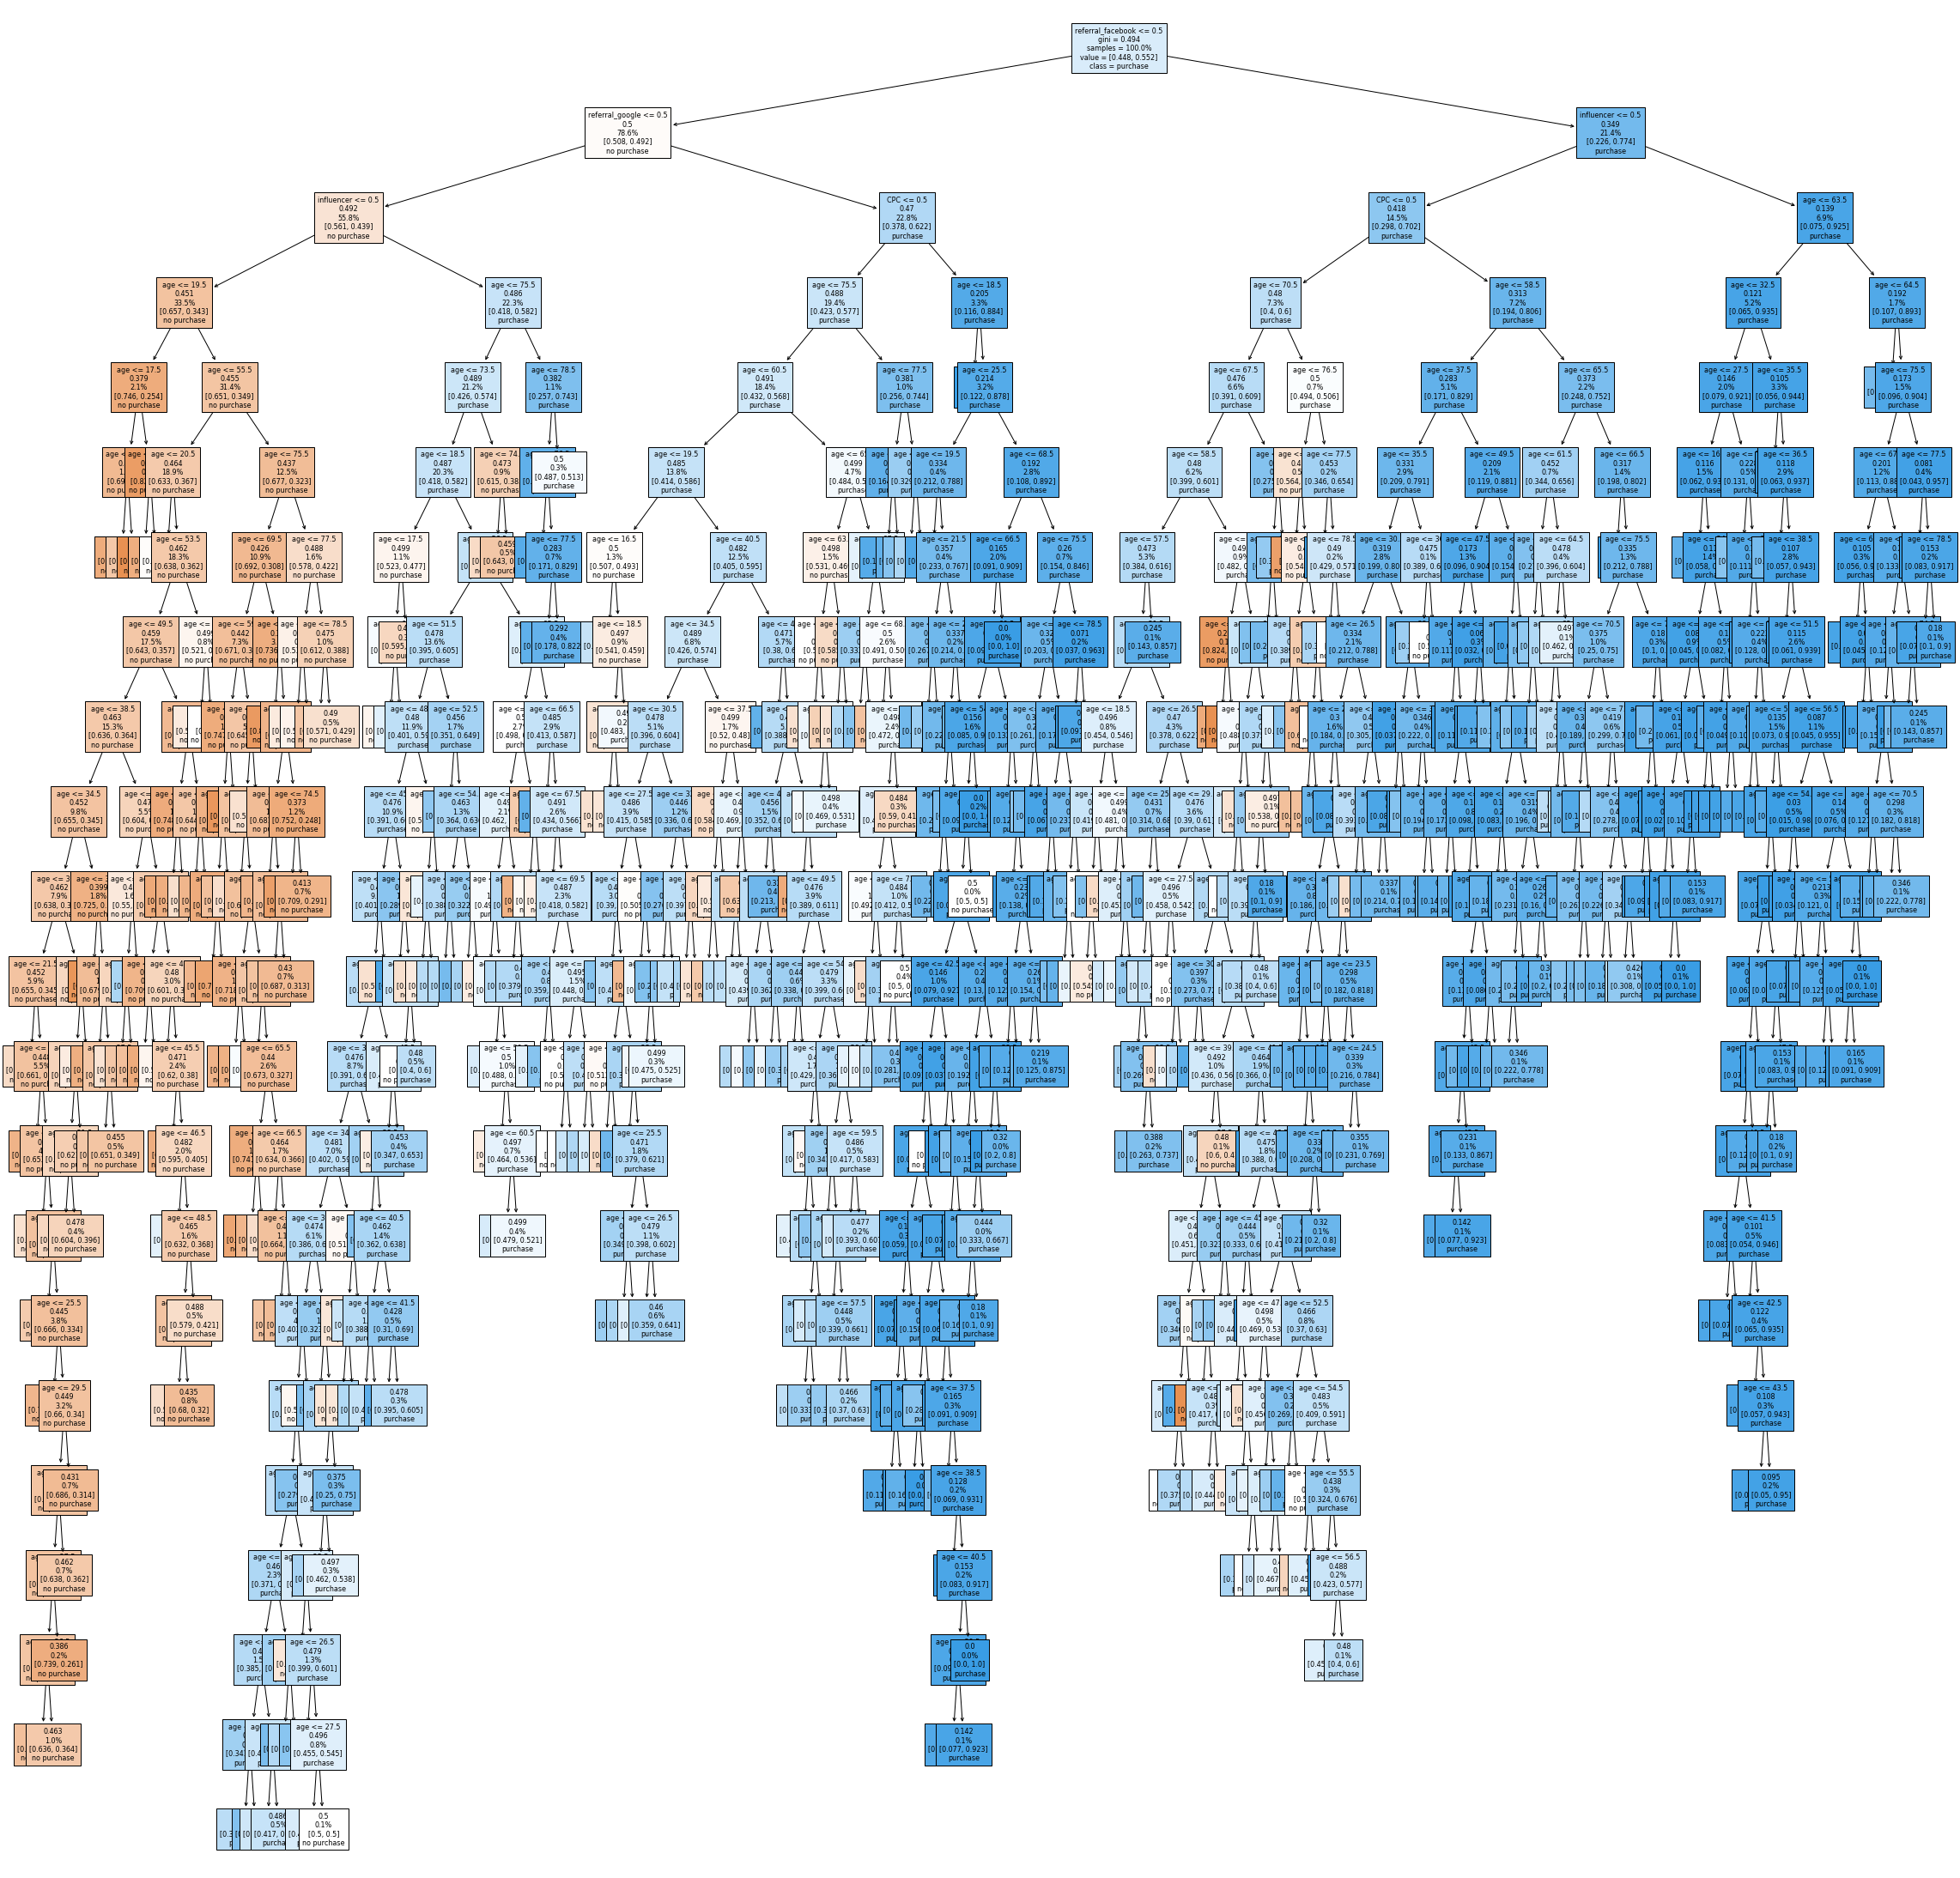

In [81]:
plt.figure(figsize=(40,40))
plot_tree(dt_clf_controls, proportion=True, label='root', 
          feature_names=['CPC', 'influencer', 'age', 'referral_google', 
                                     'referral_instagram', 'referral_facebook'], class_names=['no purchase','purchase'], filled=True, fontsize=8)
plt.show()

In [82]:
test['predicted_purchase_DT'] = dt_clf_controls.predict(test[features_controls])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [83]:
print(classification_report(test['purchase'], test['predicted_purchase_DT']))

              precision    recall  f1-score   support

         0.0       0.60      0.61      0.60      1358
         1.0       0.68      0.68      0.68      1678

    accuracy                           0.65      3036
   macro avg       0.64      0.64      0.64      3036
weighted avg       0.65      0.65      0.65      3036



In [84]:
print(classification_report(test['purchase'], test['predicted_purchase_features_controls']))

              precision    recall  f1-score   support

         0.0       0.63      0.46      0.53      1358
         1.0       0.64      0.78      0.70      1678

    accuracy                           0.64      3036
   macro avg       0.64      0.62      0.62      3036
weighted avg       0.64      0.64      0.63      3036

